In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [28]:
data = pd.read_csv("data/raw/nba_teams.csv")
coordinates = data[['latitude', 'longitude']]

In [29]:
scaler = StandardScaler()
normalized_coordinates = scaler.fit_transform(coordinates)

In [30]:
data_mean = np.mean(normalized_coordinates, axis=0)

# Calculate initial centroids for two clusters
centroid1 = data_mean - np.std(normalized_coordinates, axis=0)  # Move one standard deviation left
centroid2 = data_mean + np.std(normalized_coordinates, axis=0)  # Move one standard deviation right

# Create a list of initial centroids
initial_centroids = [centroid1, centroid2]

# Perform K-Means clustering with the custom initial centroids
num_clusters = 2
n_init = 10  # Number of initializations
kmeans = KMeans(n_clusters=num_clusters, init=np.array(initial_centroids), n_init=n_init, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_coordinates)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [31]:
cluster_labels_replaced = ['West' if label == 1 else 'East' for label in cluster_labels]
data["label"] = cluster_labels_replaced

In [32]:
print(data)

                      name                       arena  \
0            Atlanta Hawks            State Farm Arena   
1           Boston Celtics                   TD Garden   
2            Brooklyn Nets             Barclays Center   
3        Charlotte Hornets             Spectrum Center   
4            Chicago Bulls               United Center   
5      Cleveland Cavaliers  Rocket Mortgage Fieldhouse   
6         Dallas Mavericks    American Airlines Center   
7           Denver Nuggets                Pepsi Center   
8          Detroit Pistons        Little Caesars Arena   
9    Golden State Warriors                Chase Center   
10         Houston Rockets               Toyota Center   
11          Indiana Pacers     Bankers Life Fieldhouse   
12    Los Angeles Clippers              Staples Center   
13      Los Angeles Lakers              Staples Center   
14       Memphis Grizzlies                 FedEx Forum   
15              Miami Heat     American Airlines Arena   
16         Mil

In [33]:
cluster_labels_replaced = ['East' if label == 1 else 'West' for label in cluster_labels]
data["label"] = cluster_labels_replaced

In [36]:
print(data)
data["label"].value_counts()

                      name                       arena  \
0            Atlanta Hawks            State Farm Arena   
1           Boston Celtics                   TD Garden   
2            Brooklyn Nets             Barclays Center   
3        Charlotte Hornets             Spectrum Center   
4            Chicago Bulls               United Center   
5      Cleveland Cavaliers  Rocket Mortgage Fieldhouse   
6         Dallas Mavericks    American Airlines Center   
7           Denver Nuggets                Pepsi Center   
8          Detroit Pistons        Little Caesars Arena   
9    Golden State Warriors                Chase Center   
10         Houston Rockets               Toyota Center   
11          Indiana Pacers     Bankers Life Fieldhouse   
12    Los Angeles Clippers              Staples Center   
13      Los Angeles Lakers              Staples Center   
14       Memphis Grizzlies                 FedEx Forum   
15              Miami Heat     American Airlines Arena   
16         Mil

West    17
East    13
Name: label, dtype: int64

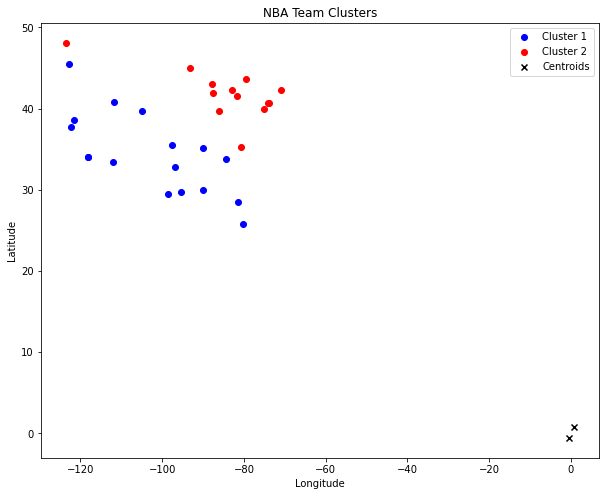

In [35]:
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster with colors 'blue' and 'red'
plt.scatter(data['longitude'][cluster_labels == 0], data['latitude'][cluster_labels == 0], c='blue', label='Cluster 1')
plt.scatter(data['longitude'][cluster_labels == 1], data['latitude'][cluster_labels == 1], c='red', label='Cluster 2')

# Cluster centers as black 'x' markers
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', color='black', label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NBA Team Clusters')
plt.legend()
plt.show()